In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn import datasets
import mglearn
from IPython.display import display

In [110]:
digits = load_digits()

In [111]:
x = digits.data
y = digits.target

In [112]:
x.shape

(1797, 64)

array([ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.,  0.,  0.,  3., 16., 15.,
       14.,  0.,  0.,  0.,  0.,  8., 13.,  8., 16.,  0.,  0.,  0.,  0.,
        1.,  6., 15., 11.,  0.,  0.,  0.,  1.,  8., 13., 15.,  1.,  0.,
        0.,  0.,  9., 16., 16.,  5.,  0.,  0.,  0.,  0.,  3., 13., 16.,
       16., 11.,  5.,  0.,  0.,  0.,  0.,  3., 11., 16.,  9.,  0.])

In [113]:
x[2].reshape(8,8)

array([[ 0.,  0.,  0.,  4., 15., 12.,  0.,  0.],
       [ 0.,  0.,  3., 16., 15., 14.,  0.,  0.],
       [ 0.,  0.,  8., 13.,  8., 16.,  0.,  0.],
       [ 0.,  0.,  1.,  6., 15., 11.,  0.,  0.],
       [ 0.,  1.,  8., 13., 15.,  1.,  0.,  0.],
       [ 0.,  9., 16., 16.,  5.,  0.,  0.,  0.],
       [ 0.,  3., 13., 16., 16., 11.,  5.,  0.],
       [ 0.,  0.,  0.,  3., 11., 16.,  9.,  0.]])

In [114]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

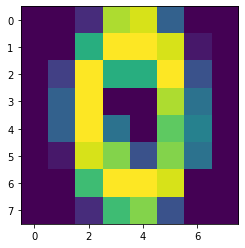

In [115]:
plt.imshow(x[55].reshape(8,8))

In [120]:
y

array([0, 1, 2, ..., 8, 9, 8])

In [80]:
y = y == 9

In [81]:
pd.Series(y).value_counts()/len(y)   # imbalanced dataset

False    0.899833
True     0.100167
dtype: float64

In [82]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=111)

In [83]:
from sklearn .dummy import DummyClassifier

# 다수의 클래스로 예측 하는 classifier생성 - 위의 데이터에 대해 100% False로만 예측
dummy_majority = DummyClassifier(strategy='most_frequent').fit(x_train, y_train)

In [84]:
preds = dummy_majority.predict(x_test)

In [85]:
np.mean(y_test == preds)

0.9083333333333333

In [86]:
dummy_majority.score(x_test, y_test)

# 전혀 분별능력이 없는 classifier가 90%의 accracy score를 기록.. <= imbalanced data
# => accuracy의 한계.. => precision, recall, fi_score, auc_score...

0.9083333333333333

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

tree_acc = tree.score(x_test, y_test)
knn_acc = knn.score(x_test, y_test)
svc_acc = svc.score(x_test, y_test)
dummy_acc  = dummy_majority.score(x_test, y_test)

print('Tree :', round(tree_acc, 2), 'Knn :', round(knn_acc, 2), 'SVC :', round(svc_acc, 2), 'dummy :', round(dummy_acc, 2))

Tree : 0.96 Knn : 1.0 SVC : 1.0 dummy : 0.91


In [88]:
from sklearn.metrics import f1_score

In [128]:
# f1_socre

tree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svc = SVC()

tree.fit(x_train, y_train)
knn.fit(x_train, y_train)
svc.fit(x_train, y_train)

tree_preds = tree.predict(x_test)
knn_preds = knn.predict(x_test)
svc_preds = svc.predict(x_test)
dummy_preds  = dummy_majority.predict(x_test)

tree_f1 = f1_score(tree_preds, y_test)
knn_f1 = f1_score(knn_preds, y_test)
svc_f1 = f1_score(svc_preds, y_test)
dummy_f1 = f1_score(dummy_preds, y_test)

print('Tree :', round(tree_f1, 2), 'Knn :', round(knn_f1, 2), 'SVC :', round(svc_f1, 2), 'dummy :', round(dummy_f1, 2))

Tree : 0.5 Knn : 0.0 SVC : 0.0 dummy : 0.0


In [129]:
from sklearn.metrics import classification_report, confusion_matrix

In [130]:
cm = confusion_matrix(tree_preds, y_test)
cm

array([[99,  0],
       [ 2,  1]], dtype=int64)

In [94]:
# 모든 머신러닝 모델은 내부적으로 확률값으로 리턴..

In [96]:
from mglearn.datasets import make_blobs
x, y = make_blobs(n_samples=(400, 5), centers=2, cluster_std=[7, 2], random_state=11)
print(x[:10], y[:10])

[[ -1.58341978 -22.37156225]
 [ -4.17570775  -5.96493849]
 [-13.82618705 -14.40188785]
 [  0.71057905  -3.81896754]
 [-16.18799493 -17.86041252]
 [ -5.04648232 -13.08413534]
 [ -2.38421045   4.24907617]
 [ -7.62667962  -7.02174225]
 [ -4.33194738 -16.93515838]
 [-10.46971421  -3.7552367 ]] [0 0 0 0 0 0 0 0 0 0]


In [171]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=111)

In [101]:
svc = SVC(gamma=0.5, probability=True)
svc.fit(x_train, y_train)
preds = svc.predict(x_test)
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [103]:
svc.decision_function(x_test) # 0보다 크면 1, 0보다 작으면 0으로 예측..

array([-1.00042127, -0.98834083, -1.00017991, -1.00268102, -1.00259514,
       -1.0097318 , -0.98095167, -0.99972821, -1.00114562, -0.99806483,
       -0.99550865, -0.99961719, -0.99849675, -0.98472113, -0.99423151,
       -0.99603354, -0.99907795, -0.99892433, -0.99827454, -0.99601774,
       -0.9925531 , -0.99938851, -0.55276913, -0.99923388, -0.99996865,
       -0.99892612, -0.99178177, -0.97920177, -0.99391665, -0.99821058,
       -0.97968924, -1.00020803, -0.98653578, -0.99996991, -0.99592681,
       -1.00038151, -1.00016914, -0.99484696, -1.00007618, -1.00023198,
       -1.00127871, -1.00007277, -0.99350691, -0.98912015, -0.97884923,
       -0.9934615 , -0.99424342, -0.98915669, -0.99371648, -1.00037992,
       -0.99657723, -0.99981443, -0.97809583, -1.00127669, -0.99545891,
       -1.00064909, -0.99691643, -0.98011279, -0.99466191, -0.9927486 ,
       -0.98245218, -0.99870695, -0.98365529, -0.9927829 , -0.99880466,
       -0.99993715, -0.9996613 , -0.99927742, -0.98167611, -1.00

In [134]:
acc = (cm[0,0] + cm[1,1])  / cm.sum()
precision = cm[0,0] / cm[:, 0].sum()
recall = cm[0, 0]/cm[0, :],sum()

C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16660/3344235484.py:2: RuntimeWarning: divide by zero encountered in longlong_scalars
  precision = cm[0,0] / cm[:0].sum()
C:\Users\bitcamp\AppData\Local\Temp/ipykernel_16660/3344235484.py:3: RuntimeWarning: divide by zero encountered in true_divide
  cm[0, 0]/cm[0, :],sum()


TypeError: sum() takes at least 1 positional argument (0 given)

In [ ]:
# sklearn에서 모델이 확률값을 리턴하는 함수..
# 1. decision_function() - 0을 기준으로, svc
# 2. predict_proba() - 0.5, 높은 확률값의 클래스, svc

In [104]:
svc.predict_proba(x_test)

array([[0.98561371, 0.01438629],
       [0.98551252, 0.01448748],
       [0.9856117 , 0.0143883 ],
       [0.98563256, 0.01436744],
       [0.98563185, 0.01436815],
       [0.98569122, 0.01430878],
       [0.98545028, 0.01454972],
       [0.98560793, 0.01439207],
       [0.98561976, 0.01438024],
       [0.98559403, 0.01440597],
       [0.98557265, 0.01442735],
       [0.985607  , 0.014393  ],
       [0.98559764, 0.01440236],
       [0.98548207, 0.01451793],
       [0.98556195, 0.01443805],
       [0.98557704, 0.01442296],
       [0.9856025 , 0.0143975 ],
       [0.98560121, 0.01439879],
       [0.98559578, 0.01440422],
       [0.98557691, 0.01442309],
       [0.98554789, 0.01445211],
       [0.98560509, 0.01439491],
       [0.98134988, 0.01865012],
       [0.9856038 , 0.0143962 ],
       [0.98560994, 0.01439006],
       [0.98560123, 0.01439877],
       [0.98554142, 0.01445858],
       [0.9854355 , 0.0145645 ],
       [0.98555932, 0.01444068],
       [0.98559525, 0.01440475],
       [0.

In [105]:
svc.predict_proba(x_test).argmax(axis=1)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [135]:
svc.decision_function(x_test)

array([-1.00927726, -1.02896865, -1.02346602, -1.01640459, -1.00425514,
       -1.00036591, -1.01540784, -1.01314319, -1.02883131, -1.01265604,
       -1.01742697, -1.0152277 , -1.02361304, -0.99696046, -1.02112944,
       -1.01900177, -1.00394303, -1.01039736, -1.00329166, -1.01810179,
       -1.00209555, -1.00450903, -0.99162977, -1.01148436, -1.01521755,
       -1.00801562, -1.00089271, -1.03111359, -1.0136792 , -1.01387944,
       -1.03192256, -1.01969876, -1.0312535 , -1.01550033, -1.0142815 ,
       -1.01484869, -1.00983989, -1.03184804, -1.02278711, -1.01165332,
       -1.01335897, -1.01025849, -1.00792459, -1.01023827, -1.01321281,
       -1.02023452, -1.02579487, -1.01505119, -1.01994672, -1.004068  ,
       -1.00224617, -1.02369554, -1.01367743, -1.00805415, -1.02645384,
       -1.01044977, -1.00646976, -1.01290196, -1.01375761, -1.01134831,
       -1.01872245, -1.00396649, -1.00175071, -1.03110905, -1.00572063,
       -1.01636185, -1.01283741, -1.01461646, -1.01309863, -1.01

In [142]:
svc.predict_proba(x_test)    # 0.5보다 크면 1, 0.5보다 작으면 0으로 예측..

AttributeError: predict_proba is not available when  probability=False

In [ ]:
svc.predict_proba(x_test).argnax(axis=1)

In [ ]:
np.where(svc.decision_function(x_test) > 0, 1 ,0)

In [143]:
# 정밀도-재현율 곡선과 평균정밀도..
# 다양한 예측확률 임계값을 통해 모델을 평가하는 방법
# 임계값이 정밀도와 재현율값의 변화를 그래프로 나타낸다..
# precision__recall_curve

In [147]:
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples=10000, centers=2, n_features=2, cluster_std=[1,2,1], random_state=11)

ValueError: Length of `clusters_std` not consistent with number of centers. Got centers = [[-6.39460622 -9.61049517]
 [-0.73562947  4.49867858]] and cluster_std = [1, 2, 1]

In [148]:
y[:5]

array([0, 1, 2, 3, 4])

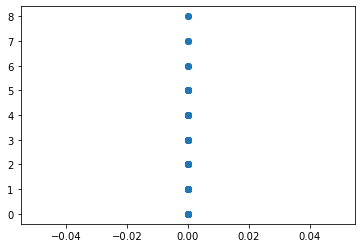

In [149]:
plt.scatter(x[:, 0], x[:, 1])

In [150]:
x_train, t_test, y_train, y_test = train_test_split(x,y , random_state=111)

In [151]:
from sklearn.svm import SVC
svc = SVC(gamma=0.05).fit(x_train, y_train)

In [156]:
>>> from sklearn.metrics import precision_recall_curve

In [157]:
percision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(x_test))

ValueError: X.shape[1] = 2 should be equal to 64, the number of features at training time

In [162]:
plt.plot(precision, recall, label='정밀도-재현율 곡선')
plt.xlabel('정밀도')
plt.ylabel('재현율')
 
# 정밀도가 높아지면 재현율은 낮아지고, 재현율이 높아지면 정밀도가 낮아진다
# 좋은 모델은 모든 임계값 수준에서 정밀도와 재현율이 동시에 높은 모델이다..
# 정밀도-재현율 곡선의 아랫부분 면적이 클수록 좋은 모델
# 정밀도-재현율 곡선의 아래면적 : averge_percision_score()

NameError: name 'recall' is not defined

In [164]:
from sklearn.metrics import averge_precision_score
averge_precision_score(y_test, scv.decision_function(x_test))

ImportError: cannot import name 'averge_precision_score' from 'sklearn.metrics' (C:\Users\bitcamp\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [166]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 100, random_state=111)
rfc.fit(x_train, y_train)

precision_rfc, recall_rfc, thresholds_rfc = precision_recall_curve(y_test, rfc.predict_proba(x_test))

ValueError: X has 2 features, but DecisionTreeClassifier is expecting 64 features as input.

In [ ]:
plt.plot(precision_rfc, recall_rfc, label='rfc-정밀도')

In [167]:
### ROA-AUC 곡선

# 모든 임계값에서 TPR(진짜 양성비율)과 FPR(거짓양성비율)을 그래프로 나타낸 곡선
# TPR - 재현율(recall), 실제 True인 데이터를 True라고 맞춘 비율
# FPR - 거짓양성비율, 실제 False인 데이터를 True라고 잘못 맞춘 비율
# TPR은 높을수록 좋고, FPR은 낮을수록 좋은 모델..
# roc-auc곡선의 면적: roc_auc_score()
# 특히 imbalaced dataset 에서 유용한 평가지표로 사용. 

In [178]:
y_test

array([7, 1, 2, 9, 5, 8, 6, 4, 8, 3, 8, 4, 4, 5, 7, 1, 6, 1, 0, 6, 6, 8,
       8, 0, 8, 4, 5, 8, 0, 0, 3, 3, 5, 2, 1, 4, 8, 6, 7, 3, 3, 9, 6, 0,
       4, 9, 7, 3, 8, 7, 4, 3, 5, 0, 3, 1, 7, 6, 5, 7, 6, 0, 9, 7, 7, 8,
       2, 8, 6, 6, 1, 1, 2, 6, 4, 6, 4, 8, 6, 9, 8, 1, 3, 4, 4, 2, 0, 7,
       6, 0, 8, 2, 0, 5, 8, 5, 3, 3, 7, 4, 7, 3, 4, 2, 4, 9, 1, 8, 5, 1,
       2, 7, 0, 2, 8, 9, 7, 5, 7, 7, 8, 8, 9, 2, 3, 9, 7, 7, 8, 2, 5, 3,
       2, 4, 0, 1, 4, 8, 7, 9, 6, 8, 1, 5, 2, 6, 1, 4, 1, 6, 1, 3, 4, 2,
       2, 7, 0, 7, 1, 5, 4, 6, 1, 3, 4, 9, 6, 8, 9, 8, 4, 3, 3, 2, 5, 6,
       7, 9, 0, 2, 0, 5, 4, 8, 0, 8, 6, 9, 7, 3, 1, 9, 4, 2, 7, 9, 4, 0,
       5, 2, 8, 2, 9, 1, 8, 5, 4, 5, 7, 7, 5, 5, 0, 1, 4, 4, 6, 5, 7, 6,
       0, 6, 7, 1, 9, 0, 6, 1, 2, 9, 1, 5, 3, 0, 2, 1, 0, 9, 3, 4, 1, 0,
       9, 9, 2, 0, 5, 3, 6, 5, 5, 3, 9, 1, 2, 8, 7, 4, 9, 8, 8, 1, 3, 1,
       6, 3, 0, 3, 2, 4, 7, 2, 5, 0, 6, 4, 7, 4, 1, 0, 3, 1, 8, 0, 5, 6,
       9, 5, 5, 0, 6, 0, 5, 2, 9, 7, 2, 9, 1, 0, 3,

In [169]:
from sklearn.metrics import roc_curve

In [180]:
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(x_test))
plt.legend()
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

# tpr은 높고, fpr은 낮을수록 좋은 모델 - 좌상으로 그려질수록 좋은 모델..
# 


ValueError: multiclass format is not supported

In [174]:
fpr_rfc, tpr_rfc, thresholds = roc_curve(y_test, rfc.predict_proba(x_test)[:, 1])

ValueError: multiclass format is not supported

In [175]:
plt.plot(fpr, tpr, label='SVC-ROC 곡선')
plt.plot(fpr_rfc, tpr_rfc, label='RFC-ROC 곡선')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

NameError: name 'fpr' is not defined

In [183]:
from sklearn.metrics import roc_auc_score
# rfc_auc_score = roc_auc_score(y_test, rfc.predict_proba(x_test)[:, 1])
svc_auc_score = roc_auc_score(y_test, svc.predict_proba(x_test)[:, 1])

AttributeError: predict_proba is not available when  probability=False